In [1]:
import numpy as np
import healpy as hp

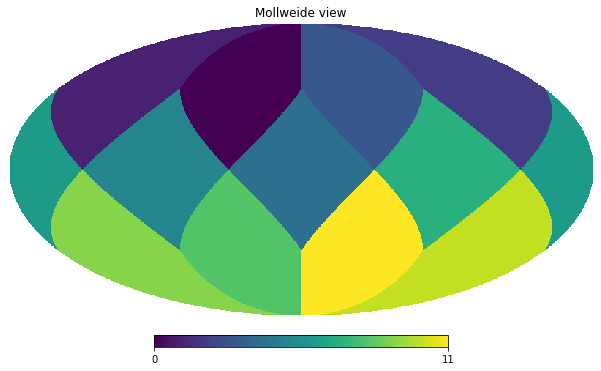

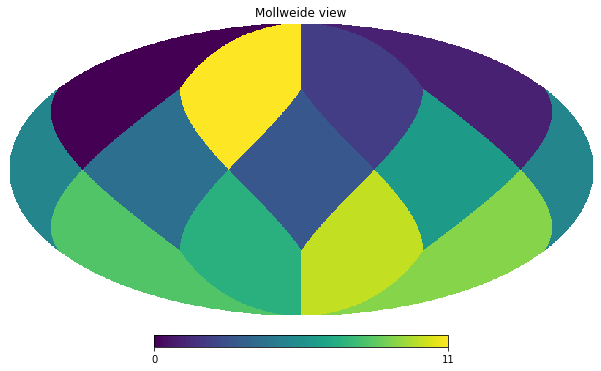

In [171]:
# First attempt : What if we took the last element in the data set and set it as the first element. 
# This shifts every other element slightly but rings are not preserved well
nside = 1
npix = hp.nside2npix(nside)
points = np.arange(npix)
points2 = np.append(points[-1],points)
points2 = points2[:-1]
#print(points,points2)
hp.mollview(points)
hp.mollview(points2)

In [159]:

def turn(nside:int,pixel_data:list) -> list:
    """ Shifts each pixel to position of ring neighbour (left)
    Parameters:
    nside -------- resolution of data set
    pixel_data --- data value for each pixel
    
    Returns:
    changed_order_data -- the pixel_data set with rearranged order
    """
    # note1: maybe insert a test to confirm that size of pixel_data corresponds with nside resolution?
    
    # calculate number of rings for given resolution
    n_rings = 4*nside -1  # determined emperically
    
    # create empty lists for each ring
    ring_indices =[]
    for i in range(n_rings): 
        ring_indices.append([])

    # set first pixel's colatitude as initial test
    colat0,long0 = hp.pix2ang(nside,0)
    test = colat0
    
    # list to collect colatitudes -----> note2: can probably be removed from code
    colats = []
    # Ring counter
    n = 0
    # Checks if colatitude of pixel is same as test
    for index,value in enumerate(pixel_data):
        colat_i,long_i = hp.pix2ang(nside,index)
        if colat_i == test:   # Same ring
            colats.append(colat_i)  #--------> note2 contd, can probaly be removed from code
            indices[n].append(index)
        else: # Move to new ring, 
            n +=1
            colats.append(colat_i)  #--------> note2 contd, can probaly be removed from code
            test = colat_i   # change this colatitude to new test value for subsequent piels
            indices[n].append(index)
            
    #print(colats)       
    #print(indices)
    
    # change order of each list
    new_indices = []
    for row in indices:  # for each ring
        np.array(row)
        # Remove last element and make it first
        new_order = np.append(row[-1],row)
        new_order = new_order[:-1]
        new_indices.append(new_order)
    #print(new_indices)
    
    # Join all rings together to create new ordered dataset
    changed_order_indices = np.concatenate(new_indices[:])
    # Use index list to get values 
    changed_order_data = np.array([])
    for index in changed_order_indices:
        changed_order_data = np.append(changed_order_data,pixel_data[index])
    #print(changed_order)
    
    return changed_order_data



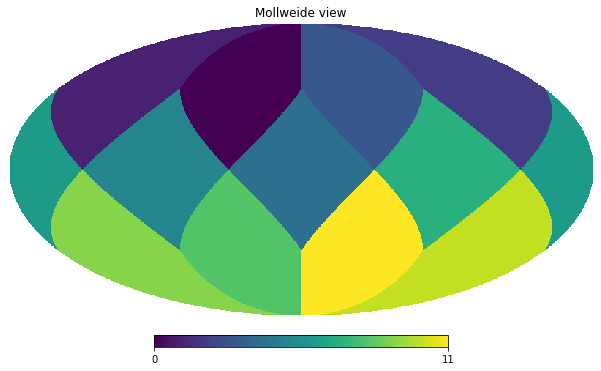

In [160]:
nside = 1
npix = hp.nside2npix(nside)
points = np.arange(npix)
hp.mollview(points)


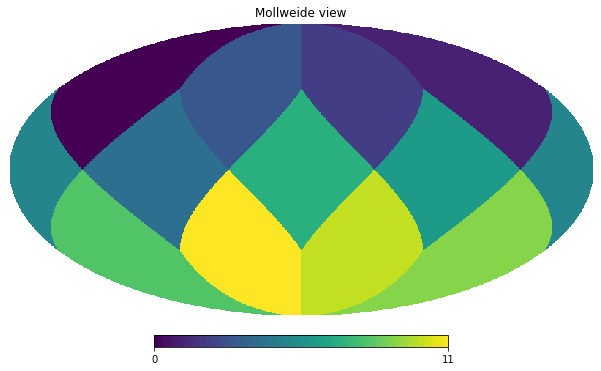

In [162]:
changed_order = turn(nside,points)
hp.mollview(changed_order)

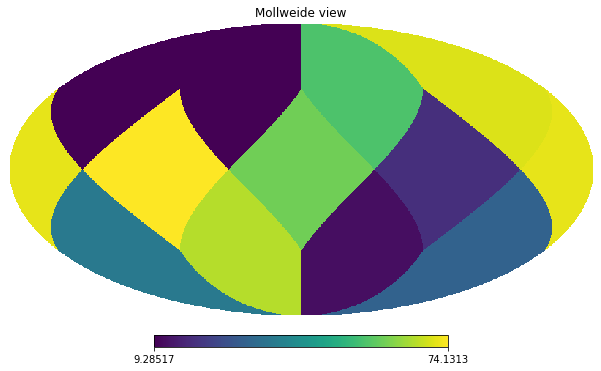

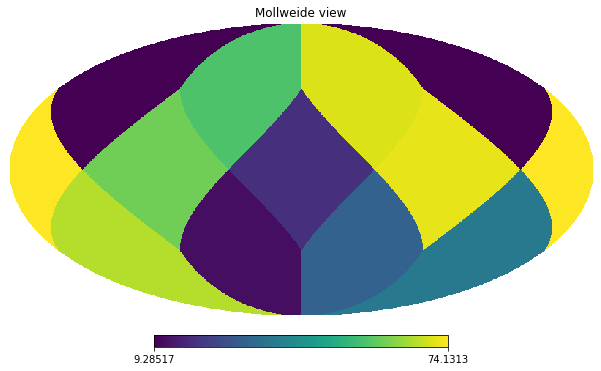

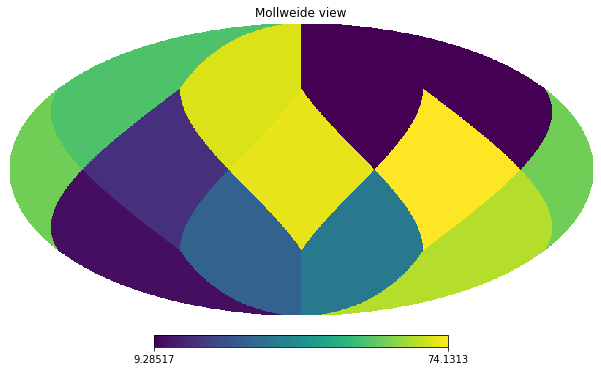

In [165]:
random = np.random.uniform(0,100,12)
hp.mollview(random)
hp.mollview(turn(1,random))
hp.mollview(turn(1,turn(1,random)))


In [173]:
!pylint turn.py

************* Module turn
turn.py:9:0: C0303: Trailing whitespace (trailing-whitespace)
turn.py:12:28: C0303: Trailing whitespace (trailing-whitespace)
turn.py:18:0: C0303: Trailing whitespace (trailing-whitespace)
turn.py:31:0: C0303: Trailing whitespace (trailing-whitespace)
turn.py:45:0: C0303: Trailing whitespace (trailing-whitespace)
turn.py:1:0: C0114: Missing module docstring (missing-module-docstring)
turn.py:4:0: R0914: Too many local variables (19/15) (too-many-locals)
turn.py:20:4: C0103: Variable name "n" doesn't conform to snake_case naming style (invalid-name)
turn.py:27:12: C0103: Variable name "n" doesn't conform to snake_case naming style (invalid-name)
turn.py:12:8: W0612: Unused variable 'i' (unused-variable)
turn.py:16:11: W0612: Unused variable 'long' (unused-variable)
turn.py:21:14: W0612: Unused variable 'value' (unused-variable)
turn.py:22:16: W0612: Unused variable 'long_i' (unused-variable)

--------------------------------------------------------------------
